# 추천 시스템 - 영화 데이터셋과 Rating Matrix를 활용하여 추천 모델 학습하기

- MovieLens Dataset

1.  ratings.dat <br>
  user_id : 영화를 시청한 사용자 아이디 <br>
  movie_id : 영화의 아이디 <br>
  rating : 평가점수 <br>
  time : 영화 시청 시간 <br>
<hr>
2.  movies_dat <br>
  movie_id : 영화의 아이디
  title : 영화 제목<br>
  genre : 영화 장르

### 데이터 전처리

In [1]:
# 데이터 불러오기
import pandas as pd

rating_url = "https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/data/ml-1m/ratings.dat"
rating_df = pd.io.parsers.read_csv(rating_url, names=["user_id", "movie_id", "rating", "time"], delimiter ='::', engine='python')
rating_df.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [2]:
movie_url = "https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/data/ml-1m/movies.dat"
movie_df = pd.io.parsers.read_csv(movie_url, names=["movie_id", "title", "genre"], delimiter ='::', engine='python', encoding='ISO-8859-1')
movie_df.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# 사용자 수
len(rating_df["user_id"].unique())

6040

In [4]:
# 영화 수
len(rating_df["movie_id"].unique())

3706

In [5]:
import matplotlib.pyplot as plt

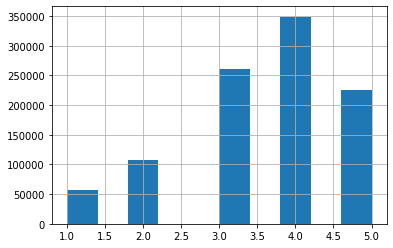

In [6]:
# 영화 평가 점수 분포
rating_df['rating'].hist();

### CF-based 모델링(KNN)

### Rating Matrix와 Colaborative Filtering(CF)

- 1. User를 Row, Item을 Column으로 하며 Value를 Rating으로 하는 행렬
- 2. Rating의 종류
  > Explicit Feedback : 영화 점수, 리뷰 점수, 좋아요 표시 ...<br>
  > Implicit Feedback : 조회, 시청, 구매, 찜 표시 ...
- 3. Rating Matrix를 추천 모델로 활용하는 방법
  > Colaborative Filtering (CF) <br>
  > Matrix Factorization (MF)

### Train/Test 데이터 분리

In [7]:
!pip install surprise

     |████████████████████████████████| 11.8MB 23.2MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617639 sha256=6cee926a5681c8710012a895bd593b4f4e01afec7a62621cfe5ac5d2e8aa0418
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [8]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1,5)) # 1점부터 5점까지
data = Dataset.load_from_df(rating_df[["user_id", "movie_id", "rating"]], reader) # 행, 열, 행과 열이 만나는 지점에서의 rating 값
trainset, testset = train_test_split(data, test_size=0.25)

### KNN 모델 학습
- KNN? (K-Nearest Neighbor)
  - 1. 새로운(혹은 특정한) 데이터 포인트 X가 있을 때, X와 가장 유사한 k개를 이용하여 데이터 포인트 X의 위치를 찾는 알고리즘
  - 2. euclidean distance, cosine similarity 등을 기준으로 유사한 k개를 계산
  - 3. 분류(classification) 문제의 경우는 k개의 포인트에서 가장 많이 등장한 class로 할당
  - 4. 예측(regression) 문제의 경우는 k개 포인트의 평군 값, 혹은 가중치 값 등으로 X의 값을 예측.

In [9]:
# KNN 예제 코드
ab = (0.9 * 4) + (0.8 * 3) + (0.7 * 5) + (0.6 * 1)
bb = (0.9) + 0.8 + 0.7 + 0.6

ab/bb

3.3666666666666663

In [10]:
from surprise import KNNBasic
from surprise import accuracy

algo = KNNBasic(k=40, min_k=1, sim_options={"user_based":True, "name":"cosine"})
algo.fit(trainset)
predictions=algo.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


### 모델링 - RMSE 평가

In [11]:
accuracy.rmse(predictions)

RMSE: 0.9773


0.9772709505041646

In [12]:
# 테스트 데이터셋 일부 결과 확인 - 모델평가
predictions = algo.test(testset[:20])

In [13]:
predictions

[Prediction(uid=4523, iid=1387, r_ui=4.0, est=3.898977223078435, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=1449, iid=481, r_ui=3.0, est=3.6743885055844467, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=4521, iid=50, r_ui=5.0, est=4.799842692913576, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=5758, iid=3555, r_ui=5.0, est=3.9503506183867163, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=1068, iid=3082, r_ui=5.0, est=3.2736650498870263, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=4406, iid=2300, r_ui=3.0, est=4.499363251906995, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=4979, iid=360, r_ui=2.0, est=2.526822778039062, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=4745, iid=3755, r_ui=3.0, est=3.44994882004353, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=5107, iid=2692, r_ui=4.0, est=4.350224637290447, d

### MF-Based Modeling
- MF의 대략적인 이해
  - 1. 원래의 행렬을 다른 2개 행렬로 분해하고, 이를 다시 원래 모양으로 만드는 과정을 Factorization이라고 함.
  - 2. 그 과정에서 Latent Facotr 라는 것을 활용하여, 행과 열의 성질을 만들어낼 수 있음.
  - 3. latent factor를 충분히 많이 만들게 되면, 유저와 아이템의 성질을 벡터로 표현 가능.
  - 4. 일반적으로 지도 학습을 통해 P와 Q를 찾게 되고, 이를 Model-based CF라고 하기도 함.

In [14]:
reader = Reader(rating_scale=(1,5)) # 1점부터 5점까지
data = Dataset.load_from_df(rating_df[["user_id", "movie_id", "rating"]], reader) # 행, 열, 행과 열이 만나는 지점에서의 rating 값
trainset, testset = train_test_split(data, test_size=0.25)

In [15]:
from surprise import SVD
from surprise import accuracy

algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)

In [16]:
# RMSE 평가
accuracy.rmse(predictions)

RMSE: 0.8782


0.878198118247729

### 모델링 & 시각화 - RMSE를 개선하는 파라미터 튜닝 자동화

In [17]:
import time

param_list = [10, 50, 100, 150, 200]
rmse_list_by_factors = []
ttime_list_by_factors = []
for n in param_list:
  train_start = time.time()
  algo = SVD(n_factors=n)
  algo.fit(trainset)
  train_end = time.time()
  print("training time of model: %.2f seconds" % (train_end - train_start))
  print("RMSE of test dataset in SVD model, n_factors=" + str(n))
  predictions = algo.test(testset)
  rmse_result = accuracy.rmse(predictions)
  rmse_list_by_factors.append(rmse_result)
  ttime_list_by_factors.append((train_end - train_start))
  print("---------------------")
print("searching n_factors is finish.")

training time of model: 15.62 seconds
RMSE of test dataset in SVD model, n_factors=10
RMSE: 0.8787
---------------------
training time of model: 28.52 seconds
RMSE of test dataset in SVD model, n_factors=50
RMSE: 0.8763
---------------------
training time of model: 43.59 seconds
RMSE of test dataset in SVD model, n_factors=100
RMSE: 0.8782
---------------------
training time of model: 58.60 seconds
RMSE of test dataset in SVD model, n_factors=150
RMSE: 0.8813
---------------------
training time of model: 73.41 seconds
RMSE of test dataset in SVD model, n_factors=200
RMSE: 0.8834
---------------------
searching n_factors is finish.


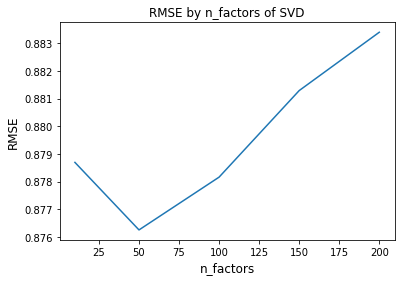

In [18]:
plt.plot(param_list, rmse_list_by_factors)
plt.title("RMSE by n_factors of SVD")
plt.ylabel("RMSE", fontsize=12)
plt.xlabel("n_factors", fontsize=12)
plt.show()

In [19]:
 # 최종 RMSE 평가
algo = SVD(n_factors=50)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8758


0.8757740314875195

In [20]:
# 테스트 데이터 셋에서 일부 결과 확인
predictions = algo.test((testset[:20]))

In [21]:
predictions

[Prediction(uid=770, iid=2019, r_ui=5.0, est=3.740276474713129, details={'was_impossible': False}),
 Prediction(uid=4598, iid=1, r_ui=5.0, est=3.771638856177995, details={'was_impossible': False}),
 Prediction(uid=2672, iid=1450, r_ui=4.0, est=3.6084489831099034, details={'was_impossible': False}),
 Prediction(uid=5689, iid=1042, r_ui=3.0, est=3.5033134736792655, details={'was_impossible': False}),
 Prediction(uid=2489, iid=1081, r_ui=2.0, est=3.5216061682210347, details={'was_impossible': False}),
 Prediction(uid=3732, iid=17, r_ui=2.0, est=3.479504972017863, details={'was_impossible': False}),
 Prediction(uid=2271, iid=1243, r_ui=5.0, est=4.169588435166766, details={'was_impossible': False}),
 Prediction(uid=655, iid=1683, r_ui=4.0, est=2.8158441643389223, details={'was_impossible': False}),
 Prediction(uid=5056, iid=367, r_ui=5.0, est=4.220690840315171, details={'was_impossible': False}),
 Prediction(uid=4912, iid=3186, r_ui=3.0, est=3.504805545959301, details={'was_impossible': Fal

### 추천 결과 평가
- 가정 : 사용자의 과거 Preference는 미래에서도 동일하다
- 1. Time Series로 추정된 선호도가 아닌, Estimate 되거나 Factorized된 점수
- 2. A시점에 평가한 선호도와, B시점에 평가한 선호도가 동일 선에서 학습됨.
- 3. Test 데이터에 대한 평가 역시, 시간이 고려되지 않은 "랜덤한 빈 공간 찾기" 식으로 평가됨.

In [22]:
# 추천 결과 평가 - 사용자별 전체 시청리스트 추출
user_watch_dict_list = rating_df.groupby('user_id')[['user_id', 'movie_id']].apply(lambda x: x["movie_id"].tolist())

In [23]:
user_watch_dict_list[:5]

user_id
1    [1193, 661, 914, 3408, 2355, 1197, 1287, 2804,...
2    [1357, 3068, 1537, 647, 2194, 648, 2268, 2628,...
3    [3421, 1641, 648, 1394, 3534, 104, 2735, 1210,...
4    [3468, 1210, 2951, 1214, 1036, 260, 2028, 480,...
5    [2987, 2333, 1175, 39, 288, 2337, 1535, 1392, ...
dtype: object

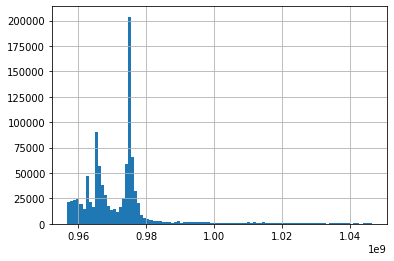

In [24]:
# 특정 시간 기준 사용자별 Train/Test  시청리스트 추출
rating_df["time"].hist(bins=100)

In [25]:
rating_df["time"].quantile(q=0.8, interpolation='nearest')

975768738

In [26]:
train_df = rating_df[rating_df['time'] < 975768738][["user_id", "movie_id", "rating"]]
test_df = rating_df[rating_df['time'] >= 975768738][["user_id", "movie_id", "rating"]]

In [27]:
train_df.shape

(800164, 3)

In [28]:
test_df.shape

(200045, 3)

In [29]:
len(train_df["user_id"].unique())

5400

In [30]:
len(test_df["user_id"].unique())

1783

In [31]:
len(train_df["movie_id"].unique())

3662

In [32]:
len(test_df["movie_id"].unique())

3511

In [33]:
user_watch_dict_list_test = test_df.groupby('user_id')[['user_id', 'movie_id']].apply(lambda x: x["movie_id"].tolist())

In [34]:
user_watch_dict_list_test[:5]

user_id
1    [1193, 661, 914, 3408, 2355, 1197, 1287, 2804,...
2    [1357, 3068, 1537, 647, 2194, 648, 2268, 2628,...
3    [3421, 1641, 648, 1394, 3534, 104, 2735, 1210,...
4    [3468, 1210, 2951, 1214, 1036, 260, 2028, 480,...
5    [2987, 2333, 1175, 39, 288, 2337, 1535, 1392, ...
dtype: object

In [35]:
# 추천 결과 평가 - 모델 기반 사용자별 선호 시청리스트 추출
data = Dataset.load_from_df(df=train_df, reader=reader)
train_data = data.build_full_trainset()
algo = SVD(n_factors=50)
algo.fit(train_data)

In [36]:
test_data = train_data.build_anti_testset()

In [37]:
predictions = algo.test(test_data[:20])

In [38]:
predictions

[Prediction(uid=635, iid=2054, r_ui=3.590506446178533, est=3.2050408871369456, details={'was_impossible': False}),
 Prediction(uid=635, iid=589, r_ui=3.590506446178533, est=4.166480331398096, details={'was_impossible': False}),
 Prediction(uid=635, iid=1261, r_ui=3.590506446178533, est=3.8815183793954433, details={'was_impossible': False}),
 Prediction(uid=635, iid=3016, r_ui=3.590506446178533, est=3.4971941598334357, details={'was_impossible': False}),
 Prediction(uid=635, iid=1274, r_ui=3.590506446178533, est=3.983823562075153, details={'was_impossible': False}),
 Prediction(uid=635, iid=2094, r_ui=3.590506446178533, est=3.3222959652235025, details={'was_impossible': False}),
 Prediction(uid=635, iid=780, r_ui=3.590506446178533, est=3.8392641905712392, details={'was_impossible': False}),
 Prediction(uid=635, iid=1603, r_ui=3.590506446178533, est=3.429794241940602, details={'was_impossible': False}),
 Prediction(uid=635, iid=2288, r_ui=3.590506446178533, est=4.045793859547725, details

### 예상 선호리스트와 실제 시청리스트로 MAP@K 계산
- [Confusion Matrix와 Recall]
  - 1. 분류 문제에서 사용하는 대표적인 평가 기준
  - 2. 무언가의 실제 클래스(binary), 그리고 예상한 클래스(binary)를 비교하기 위한 매트릭스
  - 3. 이 중 Precision은 흔히 "정확도"이라고 불리는 지표로, 맞다고 예측한 것 중에 실제로 맞는 것의 비율을 의미함.

- [추천시스템과 Precision, Recall]
  - 1. 추천시스템에 이를 대입해보자
  - 2. 유저 A가 실제로 시청한 영화들을 a, 모델이 유저 A가 볼 것이라고 예측한 영화들을 b라고 가정.
  - 3. 이 때 모델이 10개의 영화를 예측햇다면 Top 10 Precision을 계산할 수 있음.
  - 4. Recall 역시 마찬가지의 방법으로 구할 수 있음.
  - 5. Precision과 Recall에 대한 선택 기준은 상황마다 다르지만, 추천시스템에서 일반적으로 사용하는 지표는 "MAP"
  - 6. MAP(Mean Average Precision) : 추천시스템에서는 각 유저마다의 Precision을 계산한 뒤, 이것을 모든 추천 대상 유저로 확장하여 평균적인 지표를 계산.

In [39]:
predictions = algo.test(test_data)
estimated_unwatched_dict = {}

for uid, iid, _, predicted_rating, _ in predictions:
  if uid in estimated_unwatched_dict:
    estimated_unwatched_dict[uid].append((iid, predicted_rating))
  else:
    estimated_unwatched_dict[uid] = [(iid, predicted_rating)]

In [40]:
# str(estimated_unwatched_dict)[:3] - 램 부족으로 실행 불가

In [41]:
# 4점 이상을 준 test 시청리스트만 추출
user_watch_dict_list_test = test_df[test_df['rating']>=4].groupby('user_id')[['user_id', 'movie_id']].apply(lambda x: x["movie_id"].tolist())

In [63]:
tp[:1]

[]

In [56]:
user_metric = []

# 유저별 k개의 선호 리스트를 추출
k = 3
for user in estimated_unwatched_dict:
  estimated_list = estimated_unwatched_dict[user].copy()
  estimated_list.sort(key=lambda tup: tup[1], reverse=True)
  try:
    top_k_prefer_list = [movie[0] for movie in estimated_list[:k]]
    actual_watch_list = user_watch_dict_list_test[int(user)]
    user_metric.append((user, top_k_prefer_list, actual_watch_list))
  except:
    print("list index out of range, exclude user" + str(user))

list index out of range, exclude user636
list index out of range, exclude user637
list index out of range, exclude user638
list index out of range, exclude user640
list index out of range, exclude user642
list index out of range, exclude user643
list index out of range, exclude user644
list index out of range, exclude user645
list index out of range, exclude user647
list index out of range, exclude user652
list index out of range, exclude user653
list index out of range, exclude user654
list index out of range, exclude user655
list index out of range, exclude user656
list index out of range, exclude user657
list index out of range, exclude user658
list index out of range, exclude user659
list index out of range, exclude user661
list index out of range, exclude user662
list index out of range, exclude user663
list index out of range, exclude user665
list index out of range, exclude user666
list index out of range, exclude user668
list index out of range, exclude user669
list index out o

In [57]:
user_metric[:3]

[(635,
  [527, 318, 912],
  [3789,
   2987,
   2988,
   3936,
   1252,
   2997,
   1,
   3006,
   2208,
   2068,
   1267,
   593,
   2070,
   2080,
   2088,
   900,
   905,
   1293,
   1294,
   1296,
   908,
   2099,
   909,
   910,
   913,
   914,
   916,
   918,
   919,
   3200,
   3061,
   3062,
   930,
   933,
   938,
   943,
   947,
   3088,
   3089,
   1635,
   3095,
   3405,
   1660,
   994,
   232,
   242,
   3604,
   3613,
   2858,
   1131,
   1132,
   3675,
   3678,
   608,
   1150,
   1300,
   492,
   1177,
   1185,
   1187,
   1188,
   3871,
   800,
   2324,
   2182,
   1380,
   2345,
   2357,
   2501,
   1704,
   3163,
   898,
   899,
   1711,
   3176,
   3334,
   1732,
   2396,
   3199,
   3504,
   3507,
   3364,
   2565,
   300,
   164,
   2583,
   321,
   1939,
   3543,
   1940,
   3549,
   1946,
   1947,
   1948,
   1949,
   199,
   1951,
   1953,
   2757,
   348,
   2908,
   350,
   34,
   36,
   41,
   364,
   3724,
   58,
   2791,
   1054,
   3599,
   529,
   2941,


In [59]:
# 유저 한 명의 Precision
predictive_values = user_metric[0][1]
actual_values = user_metric[0][2]
tp = [pv for pv in predictive_values if pv in actual_values]
len(tp) / len(predictive_values)

0.0

In [72]:
def get_map(user_list):
  precision_list = []
  for user in user_list:
    predictive_values = user[1]
    actual_values = set(user[2])
    tp = [pv for pv in predictive_values if pv in actual_values]
    precision = len(tp) / len(predictive_values)
    precision_list.append(precision)
  return sum(precision_list) / len(precision_list)

In [73]:
get_map(user_metric)

0.14349376114082008

- 10개 추천해주면 1.4개는 성공한다는 결과 값.

### 추천 결과 평가 & 시각화 - K 파라미터 별 추천 결과 시각화

In [83]:
def get_map_topk(k):
  user_metric = []
  for user in estimated_unwatched_dict:
    estimated_list = estimated_unwatched_dict[user].copy()
    estimated_list.sort(key=lambda tup: tup[1], reverse=True)
    try:
      top_k_prefer_list = [movie[0] for movie in estimated_list[:k]]
      actual_watch_list = user_watch_dict_list_test[user_watch_dict_list_test.index==user].values.tolist()[0]
      user_metric.append((user, top_k_prefer_list, actual_watch_list))
    except:
      pass

  precision_list = []
  for user in user_metric:
    predictive_values = user[1]
    actual_values = set(user[2])
    tp = [pv for pv in predictive_values if pv in actual_values]
    precision = len(tp) / len(predictive_values)
    precision_list.append(precision)
  return sum(precision_list) / len(precision_list)

In [84]:
k_param_list = range(1, 30)

In [85]:
map_list = []

In [86]:
for k in k_param_list:
  try:
    map_list.append(get_map_topk(k))
  except ZeroDivisionError:
        print("ZeroDivision")

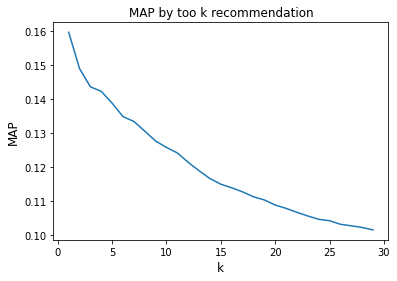

In [87]:
plt.plot(k_param_list, map_list)
plt.title("MAP by too k recommendation")
plt.ylabel('MAP', fontsize=12)
plt.xlabel('k', fontsize=12)
plt.show()